In [36]:
import pyforest
import scipy.stats as st
from statsmodels.stats.proportion import proportion_confint,proportions_ztest

In [37]:
import os
os.getcwd()

'C:\\Users\\Ranjani\\DSML\\Statistics'

In [38]:
df =pd.read_excel("Dataset.xlsx")
df.head(2)

<IPython.core.display.Javascript object>

,GRIP,ARM,RATINGS,SIMS
0,105.5,80.5,31.8,1.18
1,106.5,93.0,39.8,0.94


In [39]:
df.shape

(560, 4)

In [40]:
df

,GRIP,ARM,RATINGS,SIMS
0,105.5,80.5,31.8,1.18
1,106.5,93.0,39.8,0.94
2,94.0,81.0,46.8,0.84
3,90.5,33.5,52.2,-2.45
4,104.0,47.5,31.2,1.00
...,...,...,...,...
555,113.0,87.0,49.1,-0.25
556,133.5,96.5,44.6,2.27
557,89.5,63.5,37.8,-0.93
558,95.0,70.0,35.4,-0.58


In [41]:
df.describe()

,GRIP,ARM,RATINGS,SIMS
count,560.000000,560.000000,560.000000,560.000000
mean,110.185714,80.030357,40.986082,0.214321
std,20.219577,17.845114,7.806317,2.520152
min,29.000000,19.000000,21.600000,-4.170000
25%,99.000000,69.500000,35.600000,-0.800000
50%,110.000000,82.500000,40.800000,0.030000
75%,121.500000,90.500000,47.125000,0.910000
max,189.000000,132.000000,57.200000,49.000000


In [42]:
df.isnull().sum()

GRIP       0
ARM        0
RATINGS    0
SIMS       0
dtype: int64

<IPython.core.display.Javascript object>

<Axes: xlabel='GRIP', ylabel='Count'>

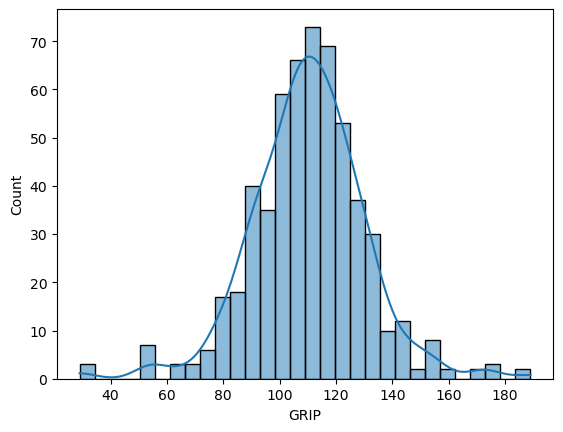

In [43]:
sns.histplot(data=df,x="GRIP", kde= True)

<IPython.core.display.Javascript object>

<Axes: xlabel='ARM', ylabel='Count'>

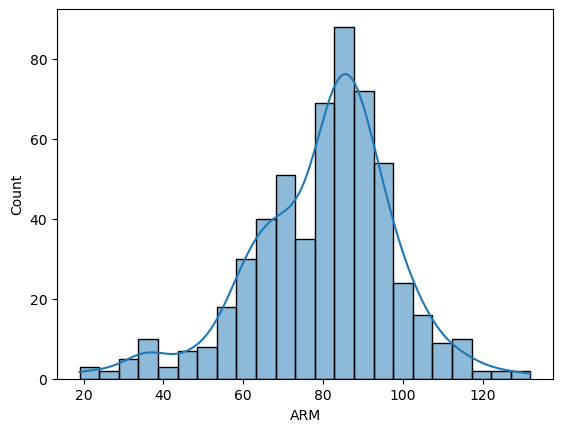

In [44]:
sns.histplot(data=df,x="ARM",kde=True)

<IPython.core.display.Javascript object>

<Axes: xlabel='RATINGS', ylabel='Count'>

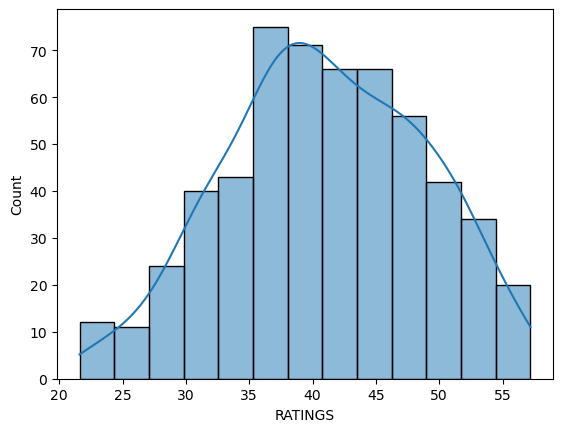

In [45]:
sns.histplot(data=df,x="RATINGS", kde = True)

<IPython.core.display.Javascript object>

<Axes: xlabel='SIMS', ylabel='Count'>

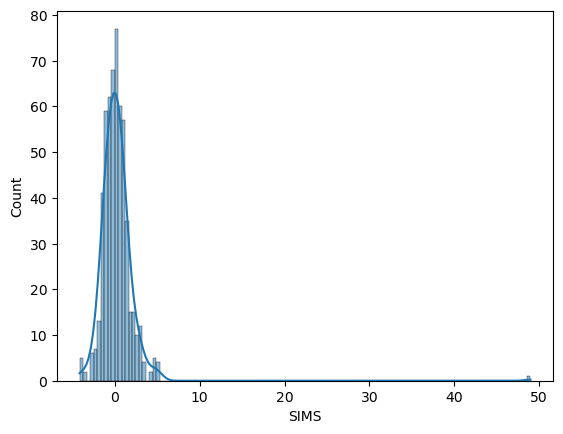

In [46]:
sns.histplot(data=df,x="SIMS", kde = True)

In [47]:
df["SIMS"].mean()

0.21432142857142855

<IPython.core.display.Javascript object>

<Axes: xlabel='GRIP', ylabel='RATINGS'>

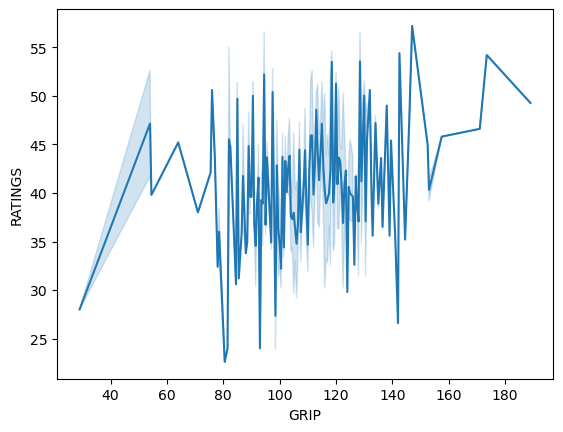

In [48]:
# EDA using plots to find the relationship. Unsure what hypothesis test is to be done
#grip vs ratings
sns.lineplot(data=df, x = "GRIP", y ="RATINGS")

<IPython.core.display.Javascript object>

<Axes: xlabel='GRIP', ylabel='RATINGS'>

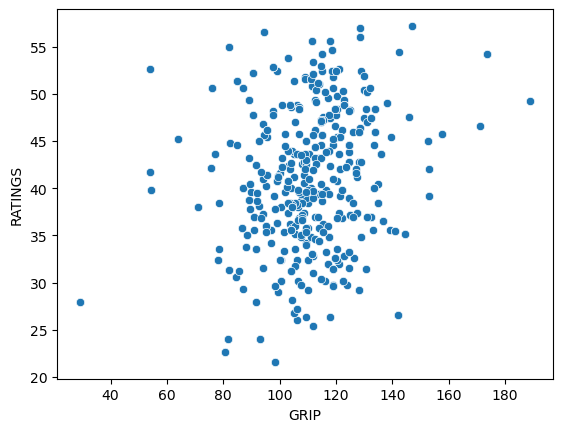

In [49]:
sns.scatterplot(data=df, x = "GRIP", y ="RATINGS")

No relation found for  grip and ratings

<IPython.core.display.Javascript object>

<Axes: xlabel='GRIP', ylabel='SIMS'>

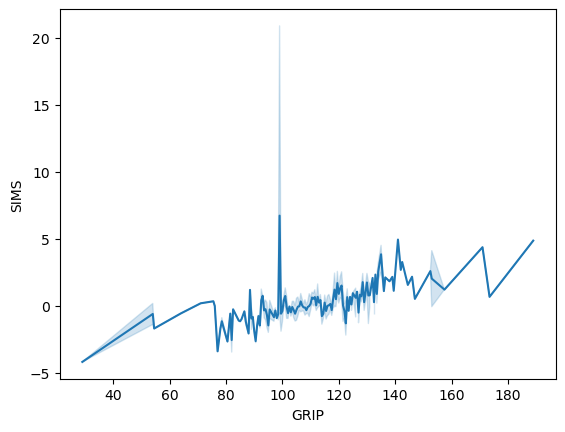

In [50]:
#grip vs sims
sns.lineplot(data=df, x = "GRIP", y ="SIMS")

<IPython.core.display.Javascript object>

<Axes: xlabel='GRIP', ylabel='SIMS'>

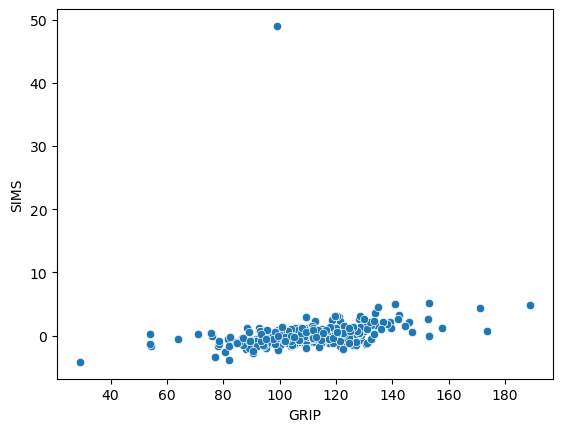

In [51]:
sns.scatterplot(data=df, x = "GRIP", y ="SIMS")

There seems to be a relatioship between grip to sims score

<IPython.core.display.Javascript object>

<Axes: xlabel='ARM', ylabel='RATINGS'>

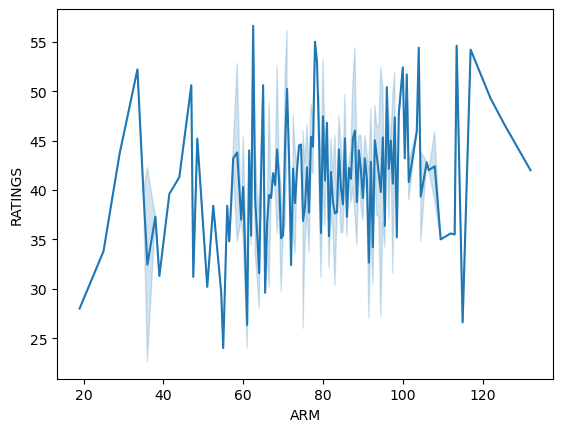

In [52]:
#arm vs ratings
sns.lineplot(data=df, x = "ARM", y ="RATINGS")

<IPython.core.display.Javascript object>

<Axes: xlabel='ARM', ylabel='RATINGS'>

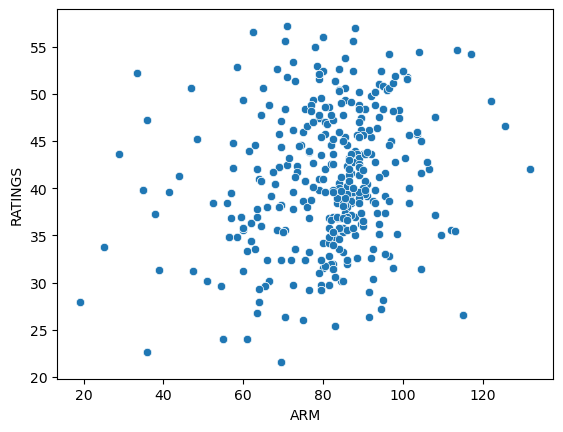

In [53]:
sns.scatterplot(data=df, x = "ARM", y ="RATINGS")

<IPython.core.display.Javascript object>

<Axes: xlabel='ARM', ylabel='SIMS'>

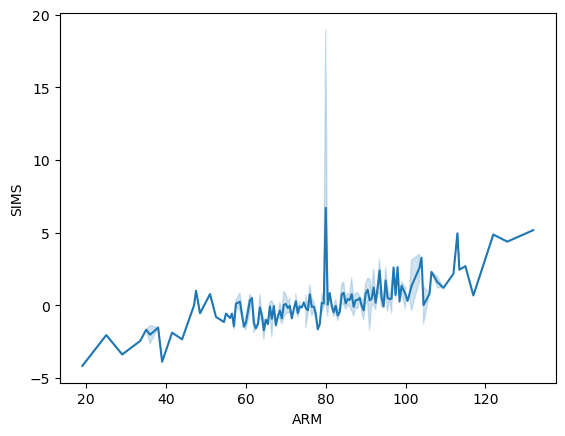

In [54]:
#arm vs sims
sns.lineplot(data=df, x = "ARM", y ="SIMS")

<IPython.core.display.Javascript object>

<Axes: xlabel='ARM', ylabel='SIMS'>

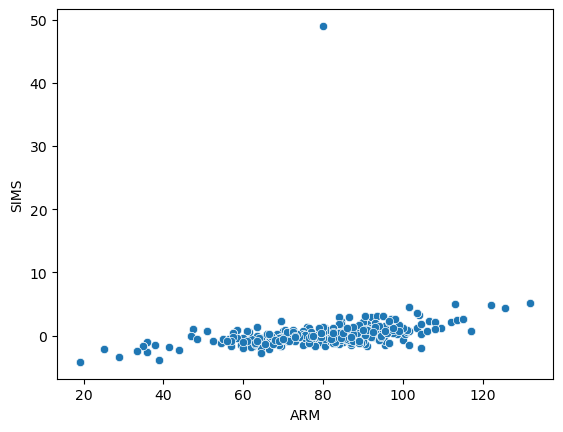

In [55]:
sns.scatterplot(data=df, x = "ARM", y ="SIMS")

There is a linear relation between arm and sims score too. Thus strength parameters arm and grip are related to SIMS score

In [65]:
import pandas as pd
import numpy as np

In [73]:

grip_sample = df["GRIP"].sample(n=30)
grip_sample

grip_sample_list = grip_sample.tolist()
grip_sample_list


[117.5,
 112.0,
 94.5,
 109.5,
 134.0,
 122.0,
 112.0,
 82.0,
 85.0,
 131.0,
 54.5,
 54.0,
 92.0,
 112.0,
 133.0,
 105.5,
 115.0,
 94.0,
 121.5,
 91.5,
 109.5,
 106.0,
 122.0,
 108.0,
 118.0,
 105.5,
 120.5,
 99.0,
 29.0,
 129.0]

In [69]:
sims_sample = df["SIMS"].sample(n=30)
sims_sample

sims_sample_list = sims_sample.tolist()
sims_sample_list

[1.33,
 1.21,
 -0.62,
 -1.11,
 0.36,
 -1.1,
 0.42,
 -0.62,
 -0.25,
 -0.53,
 -2.79,
 -1.11,
 0.9,
 0.94,
 -0.3,
 -0.41,
 0.77,
 0.35,
 3.16,
 1.85,
 0.74,
 4.87,
 -1.18,
 -2.65,
 3.51,
 -3.88,
 -0.94,
 2.37,
 -1.16,
 0.23]

In [76]:
from scipy.stats import pearsonr

r,p = pearsonr(grip_sample_list,sims_sample_list)
print(f"Pearson correlation coefficient (r) : {r:.4f}")
print(f"Two tailed p-value: {p:.4f}")

Pearson correlation coefficient (r) : 0.2572
Two tailed p-value: 0.1700


In [78]:
arm_sample = df["ARM"].sample(n=30)
arm_sample

arm_sample_list = arm_sample.tolist()
print(arm_sample_list)


sims_sample = df["SIMS"].sample(n=30)
sims_sample

sims_sample_list = sims_sample.tolist()
print(sims_sample_list)

[64.0, 77.5, 96.5, 55.0, 100.0, 86.0, 86.0, 62.0, 73.0, 96.5, 69.5, 94.0, 85.0, 84.0, 93.5, 78.5, 77.0, 79.5, 104.5, 79.5, 87.0, 69.5, 95.0, 75.5, 87.5, 83.0, 93.0, 87.0, 82.0, 90.5]
[-0.61, 0.79, 1.33, 0.76, 2.45, 0.85, -0.15, -0.04, -1.02, 3.04, -1.38, 2.18, 0.23, -2.04, -2.79, 0.42, 2.37, 2.18, -0.12, -0.5, -1.12, 1.47, 0.71, 0.2, 2.6, 2.6, 1.18, -0.15, 0.15, -1.18]


In [79]:
from scipy.stats import pearsonr

r2,p2 = pearsonr(arm_sample_list,sims_sample_list)
print(f"Pearson correlation coefficient (r) : {r2:.4f}")
print(f"Two tailed p-value: {p2:.4f}")

Pearson correlation coefficient (r) : 0.1658
Two tailed p-value: 0.3811


In [56]:
#Finding correlation between grip and sims score

<IPython.core.display.Javascript object>

<Axes: >

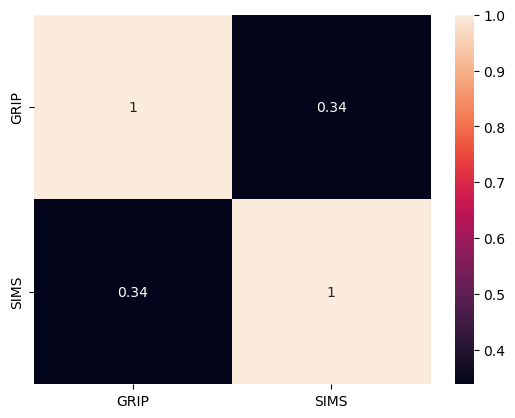

In [57]:
sns.heatmap(df[['GRIP','SIMS']].corr(),annot=True)

<IPython.core.display.Javascript object>

<Axes: >

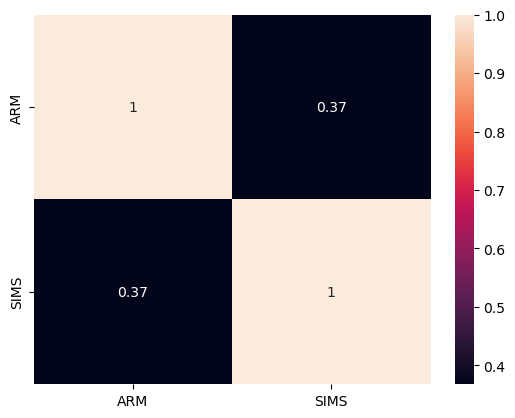

In [58]:
sns.heatmap(df[['ARM','SIMS']].corr(),annot=True)